# Import Necessary Libraries and Load Data

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
# Function to load Google Sheets data
def load_google_sheet(sheet_url):
    csv_url = sheet_url.replace("/edit?usp=sharing", "/gviz/tq?tqx=out:csv")
    return pd.read_csv(csv_url)

# Define Google Sheets URLs
sheets = {
    "dai_data": "https://docs.google.com/spreadsheets/d/1VECr6m9WLtGTzm9NmH1-zr-QC4b4Bc-TwhSC4ccCEzc/edit?usp=sharing",
    "hatch_data": "https://docs.google.com/spreadsheets/d/1G2xFtjYwx25sQCG7HXUOeShaJf50bI2iotK1pnjaaHI/edit?usp=sharing",
    "stock_data": "https://docs.google.com/spreadsheets/d/1WChQ8C35ywn_hyF5cWZ_XiNxgYXlsmHoLEdyNPz2YPs/edit?usp=sharing"
}


In [19]:
# Load the data from all three sheets
dataframes = {name: load_google_sheet(url) for name, url in sheets.items()}

# Display first few rows of each dataset
for name, df in dataframes.items():
    print(f"\n📌 First 5 rows of {name} dataset:")
    display(df.head())


📌 First 5 rows of dai_data dataset:


country  Year  Digital Adoption Index  DAI Business Sub-index  \
0  Afghanistan  2014                0.302608                0.296788   
1  Afghanistan  2016                0.343214                0.341886   
2      Albania  2014                0.543884                0.554248   
3      Albania  2016                0.607904                0.621125   
4      Algeria  2014                0.369554                0.449673   

   DAI People Sub-index  DAI Government Sub-index  
0              0.087707                  0.523330  
1              0.123343                  0.564413  
2              0.387060                  0.690344  
3              0.463779                  0.738807  
4              0.279038                  0.379950


📌 First 5 rows of hatch_data dataset:


Model        Scenario  \
0  Technology Indicators  Release 2023.1   
1  Technology Indicators  Release 2023.1   
2  Technology Indicators  Release 2023.1   
3  Technology Indicators  Release 2023.1   
4  Technology Indicators  Release 2023.1   

                                            Variable      Short Name Unit  \
0           Cumulative Total Capacity|Oil Refineries  Oil Refineries   MW   
1   Cumulative Total Capacity|Electricity|Coal Power      Coal Power   MW   
2  Cumulative Total Capacity|Electricity|Hydro Power     Hydro Power   MW   
3  Cumulative Total Capacity|Electricity|Natural Gas     Natural Gas   MW   
4            Cumulative Total Capacity|Jet Aircrafts   Jet Aircrafts   MW   

  Region  1720  1721  1722  1723  ...      2013       2014       2015  \
0  World   NaN   NaN   NaN   NaN  ...       NaN        NaN        NaN   
1  World   NaN   NaN   NaN   NaN  ...       NaN        NaN        NaN   
2  World   NaN   NaN   NaN   NaN  ...  990113.0  1026227.0  1058285.0   
3  World   NaN   NaN   NaN   NaN  ...       NaN        NaN        NaN   
4  World   NaN   NaN   NaN   NaN  ...       NaN        NaN        NaN   

        2016       2017  2018  2019  2020  2021  2022  
0        NaN        NaN   NaN   NaN   NaN   NaN   NaN  
1        NaN        NaN   NaN   NaN   NaN   NaN   NaN  
2  1085809.0  1108481.0   NaN   NaN   NaN   NaN   NaN  
3        NaN        NaN   NaN   NaN   NaN   NaN   NaN  
4        NaN        NaN   NaN   NaN   NaN   NaN   NaN  

[5 rows x 309 columns]


📌 First 5 rows of stock_data dataset:


Ticker Symbol                 Security             GICS Sector  \
0           AAL  American Airlines Group             Industrials   
1          ABBV                   AbbVie             Health Care   
2           ABT      Abbott Laboratories             Health Care   
3          ADBE        Adobe Systems Inc  Information Technology   
4           ADI     Analog Devices, Inc.  Information Technology   

       GICS Sub Industry  Current Price  Price Change  Volatility  ROE  \
0               Airlines      42.349998      9.999995    1.687151  135   
1        Pharmaceuticals      59.240002      8.339433    2.197887  130   
2  Health Care Equipment      44.910000     11.301121    1.273646   21   
3   Application Software      93.940002     13.977195    1.357679    9   
4         Semiconductors      55.320000     -1.827858    1.701169   14   

   Cash Ratio  Net Cash Flow  Net Income  Earnings Per Share  \
0          51     -604000000  7610000000               11.39   
1          77       51000000  5144000000                3.15   
2          67      938000000  4423000000                2.94   
3         180     -240840000   629551000                1.26   
4         272      315120000   696878000                0.31   

   Estimated Shares Outstanding   P/E Ratio  P/B Ratio  
0                  6.681299e+08    3.718174  -8.784219  
1                  1.633016e+09   18.806350  -8.750068  
2                  1.504422e+09   15.275510  -0.394171  
3                  4.996437e+08   74.555557   4.199651  
4                  2.247994e+09  178.451613   1.059810

Copy Data for Further Processing

In [20]:
# To Create copies of the dataframes for processing
dai_data = dataframes["dai_data"].copy()
hatch_data = dataframes["hatch_data"].copy()
stock_data = dataframes["stock_data"].copy()


Apply Styling to DataFrames

In [21]:
# Function to apply styling to DataFrames
def style_dataframe(df):
    return df.style.set_properties(**{
        'background-color': 'lightgrey',
        'color': 'black',
        'border-color': 'white'
    })

# Apply styling to each DataFrame
styled_dai_data = style_dataframe(dai_data)
styled_hatch_data = style_dataframe(hatch_data)
styled_stock_data = style_dataframe(stock_data)

# Display styled DataFrames
print("Styled dai_data:")
display(styled_dai_data)
print("Styled hatch_data:")
display(styled_hatch_data)
print("Styled stock_data:")
display(styled_stock_data)


Styled dai_data:


Styled hatch_data:


Styled stock_data:


Data Check and Cleaning Process

In [22]:
# Function to check and clean data
def check_and_clean_data(df):
    print("Data Types:")
    print(df.dtypes)
    print("\nMissing Values:")
    print(df.isnull().sum())
    print("\nDuplicate Rows:")
    print(df.duplicated().sum())
    print("\nSummary Statistics:")
    print(df.describe(include='all'))
    return df

# Apply the function to each DataFrame
dai_data = check_and_clean_data(dai_data)
hatch_data = check_and_clean_data(hatch_data)
stock_data = check_and_clean_data(stock_data)


Data Types:
country                      object
Year                          int64
Digital Adoption Index      float64
DAI Business Sub-index      float64
DAI People Sub-index        float64
DAI Government Sub-index    float64
dtype: object

Missing Values:
country                     0
Year                        0
Digital Adoption Index      6
DAI Business Sub-index      0
DAI People Sub-index        0
DAI Government Sub-index    6
dtype: int64

Duplicate Rows:
0

Summary Statistics:
            country         Year  Digital Adoption Index  \
count           366   366.000000              360.000000   
unique          183          NaN                     NaN   
top     Afghanistan          NaN                     NaN   
freq              2          NaN                     NaN   
mean            NaN  2015.000000                0.496687   
std             NaN     1.001369                0.192720   
min             NaN  2014.000000                0.138555   
25%             NaN  2014.00

In [23]:
# Function to handle duplicates and missing values
def handle_duplicates_and_missing_values(df):
    # Drop duplicate rows
    df = df.drop_duplicates()
    # Fill missing values with 'Null'
    df = df.fillna('Null')
    return df

# Apply the function to each DataFrame
dai_data = handle_duplicates_and_missing_values(dai_data)
hatch_data = handle_duplicates_and_missing_values(hatch_data)
stock_data = handle_duplicates_and_missing_values(stock_data)

# Verify no missing values remain
print("Missing Values after cleaning:")
print("dai_data:", dai_data.isnull().sum().sum())
print("hatch_data:", hatch_data.isnull().sum().sum())
print("stock_data:", stock_data.isnull().sum().sum())

Missing Values after cleaning:
dai_data: 0
hatch_data: 0
stock_data: 0


In [54]:
# Function to display statistical summary
def display_statistical_summary(df, name):
    print(f"\nStatistical Summary for {name}:")
    display(df.describe(include='all'))

# Display summaries
display_statistical_summary(dai_data, 'dai_data')
display_statistical_summary(hatch_data, 'hatch_data')
display_statistical_summary(stock_data, 'stock_data')


Statistical Summary for dai_data:


country         Year Digital Adoption Index  \
count           366   366.000000                    366   
unique          183          NaN                    361   
top     Afghanistan          NaN                   Null   
freq              2          NaN                      6   
mean            NaN  2015.000000                    NaN   
std             NaN     1.001369                    NaN   
min             NaN  2014.000000                    NaN   
25%             NaN  2014.000000                    NaN   
50%             NaN  2015.000000                    NaN   
75%             NaN  2016.000000                    NaN   
max             NaN  2016.000000                    NaN   

        DAI Business Sub-index  DAI People Sub-index DAI Government Sub-index  
count               366.000000            366.000000                      366  
unique                     NaN                   NaN                      357  
top                        NaN                   NaN                     Null  
freq                       NaN                   NaN                        6  
mean                  0.559388              0.419583                      NaN  
std                   0.195193              0.242190                      NaN  
min                   0.130037              0.009919                      NaN  
25%                   0.398678              0.199574                      NaN  
50%                   0.560046              0.405670                      NaN  
75%                   0.707369              0.627989                      NaN  
max                   0.973952              0.913343                      NaN


Statistical Summary for hatch_data:


Model        Scenario  \
count                     147             147   
unique                      1               1   
top     Technology Indicators  Release 2023.1   
freq                      147             147   

                                        Variable      Short Name Unit Region  \
count                                        147             147  147    147   
unique                                       147             147   42      3   
top     Cumulative Total Capacity|Oil Refineries  Oil Refineries   MW  World   
freq                                           1               1   34    121   

        1720  1721  1722  1723  ...  2013  2014  2015  2016  2017  2018  2019  \
count    147   147   147   147  ...   147   147   147   147   147   147   147   
unique     2     1     1     1  ...    57    56    57    53    51    39    31   
top     Null  Null  Null  Null  ...  Null  Null  Null  Null  Null  Null  Null   
freq     146   147   147   147  ...    91    92    91    95    97   109   117   

        2020  2021  2022  
count    147   147   147  
unique    25     7     1  
top     Null  Null  Null  
freq     123   141   147  

[4 rows x 309 columns]


Statistical Summary for stock_data:


Ticker Symbol Security  GICS Sector  \
count            340      340          340   
unique           340      340           11   
top              ZTS   Zoetis  Industrials   
freq               1        1           53   
mean             NaN      NaN          NaN   
std              NaN      NaN          NaN   
min              NaN      NaN          NaN   
25%              NaN      NaN          NaN   
50%              NaN      NaN          NaN   
75%              NaN      NaN          NaN   
max              NaN      NaN          NaN   

                         GICS Sub Industry  Current Price  Price Change  \
count                                  340     340.000000    340.000000   
unique                                 104            NaN           NaN   
top     Oil & Gas Exploration & Production            NaN           NaN   
freq                                    16            NaN           NaN   
mean                                   NaN      80.862345      4.078194   
std                                    NaN      98.055086     12.006338   
min                                    NaN       4.500000    -47.129693   
25%                                    NaN      38.555000     -0.939484   
50%                                    NaN      59.705000      4.819505   
75%                                    NaN      92.880001     10.695493   
max                                    NaN    1274.949951     55.051683   

        Volatility         ROE  Cash Ratio  Net Cash Flow    Net Income  \
count   340.000000  340.000000  340.000000   3.400000e+02  3.400000e+02   
unique         NaN         NaN         NaN            NaN           NaN   
top            NaN         NaN         NaN            NaN           NaN   
freq           NaN         NaN         NaN            NaN           NaN   
mean      1.525976   39.597059   70.023529   5.553762e+07  1.494385e+09   
std       0.591798   96.547538   90.421331   1.946365e+09  3.940150e+09   
min       0.733163    1.000000    0.000000  -1.120800e+10 -2.352800e+10   
25%       1.134878    9.750000   18.000000  -1.939065e+08  3.523012e+08   
50%       1.385593   15.000000   47.000000   2.098000e+06  7.073360e+08   
75%       1.695549   27.000000   99.000000   1.698108e+08  1.899000e+09   
max       4.580042  917.000000  958.000000   2.076400e+10  2.444200e+10   

        Earnings Per Share  Estimated Shares Outstanding   P/E Ratio  \
count           340.000000                  3.400000e+02  340.000000   
unique                 NaN                           NaN         NaN   
top                    NaN                           NaN         NaN   
freq                   NaN                           NaN         NaN   
mean              2.776662                  5.770283e+08   32.612563   
std               6.587779                  8.458496e+08   44.348731   
min             -61.200000                  2.767216e+07    2.935451   
25%               1.557500                  1.588482e+08   15.044653   
50%               2.895000                  3.096751e+08   20.819876   
75%               4.620000                  5.731175e+08   31.764755   
max              50.090000                  6.159292e+09  528.039074   

         P/B Ratio  
count   340.000000  
unique         NaN  
top            NaN  
freq           NaN  
mean     -1.718249  
std      13.966912  
min     -76.119077  
25%      -4.352056  
50%      -1.067170  
75%       3.917066  
max     129.064585

In [55]:
import pandas as pd
import requests
from io import StringIO
import os
from google.colab import drive

In [56]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [57]:
def download_google_sheet_as_dataframe(sheet_url):
    try:
        # Extract the Google Sheet ID from the URL
        sheet_id = sheet_url.split('/d/')[1].split('/')[0]
        # Construct the CSV export URL
        csv_url = f'https://docs.google.com/spreadsheets/d/{sheet_id}/export?format=csv'
        # Send a GET request to fetch the CSV data
        response = requests.get(csv_url)
        response.raise_for_status()  # Raise an exception for HTTP errors
        # Read the CSV data into a pandas DataFrame
        data = pd.read_csv(StringIO(response.text))
        return data
    except requests.exceptions.RequestException as e:
        print(f"Request error: {e}")
        return None
    except pd.errors.ParserError as e:
        print(f"Parsing error: {e}")
        return None

In [58]:
sheets = {
    "dai_data": "https://docs.google.com/spreadsheets/d/1VECr6m9WLtGTzm9NmH1-zr-QC4b4Bc-TwhSC4ccCEzc/edit?usp=sharing",
    "hatch_data": "https://docs.google.com/spreadsheets/d/1G2xFtjYwx25sQCG7HXUOeShaJf50bI2iotK1pnjaaHI/edit?usp=sharing",
    "stock_data": "https://docs.google.com/spreadsheets/d/1WChQ8C35ywn_hyF5cWZ_XiNxgYXlsmHoLEdyNPz2YPs/edit?usp=sharing"
}

In [59]:
# Define the path in Google Drive where you want to save the files
drive_folder = '/content/drive/My Drive/ColabData/'

# Ensure the directory exists; create it if it doesn't
os.makedirs(drive_folder, exist_ok=True)

for name, url in sheets.items():
    print(f"Processing {name}...")
    df = download_google_sheet_as_dataframe(url)
    if df is not None:
        file_path = os.path.join(drive_folder, f"{name}.csv")
        df.to_csv(file_path, index=False)
        print(f"✅ {name} dataset saved as {file_path}")
    else:
        print(f"❌ {name} dataset could not be loaded.")

Processing dai_data...
✅ dai_data dataset saved as /content/drive/My Drive/ColabData/dai_data.csv
Processing hatch_data...
✅ hatch_data dataset saved as /content/drive/My Drive/ColabData/hatch_data.csv
Processing stock_data...
✅ stock_data dataset saved as /content/drive/My Drive/ColabData/stock_data.csv


In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [64]:
def perform_eda(df, dataset_name):
    """
    Perform EDA by plotting Distribution and Box Plots for numerical features.

    Parameters:
    - df: pandas DataFrame containing the dataset.
    - dataset_name: String name of the dataset.
    """
    # Select numerical columns
    numerical_cols = df.select_dtypes(include=['number']).columns

    for col in numerical_cols:
        plt.figure(figsize=(14, 6))

        # Distribution Plot
        plt.subplot(1, 2, 1)
        sns.histplot(df[col], kde=True, color='blue')
        plt.title(f'Distribution of {col} in {dataset_name}')
        plt.xlabel(col)
        plt.ylabel('Frequency')

        # Box Plot
        plt.subplot(1, 2, 2)
        sns.boxplot(x=df[col], color='green')
        plt.title(f'Box Plot of {col} in {dataset_name}')
        plt.xlabel(col)

        plt.tight_layout()
        plt.show()

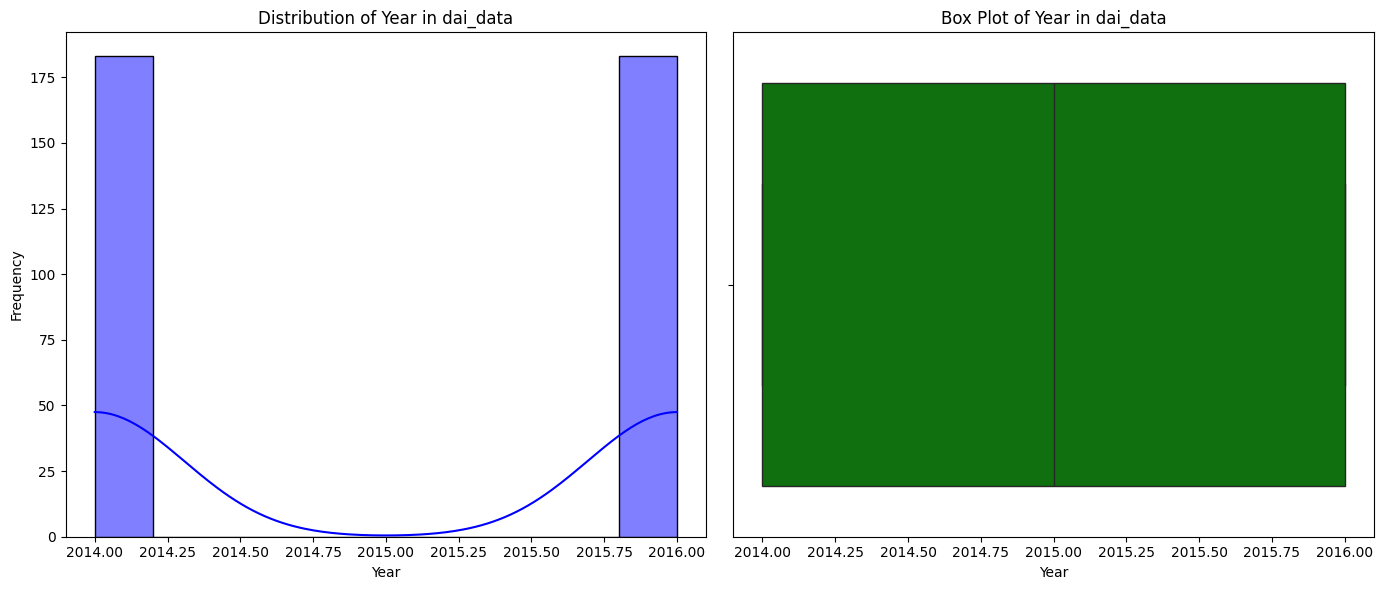

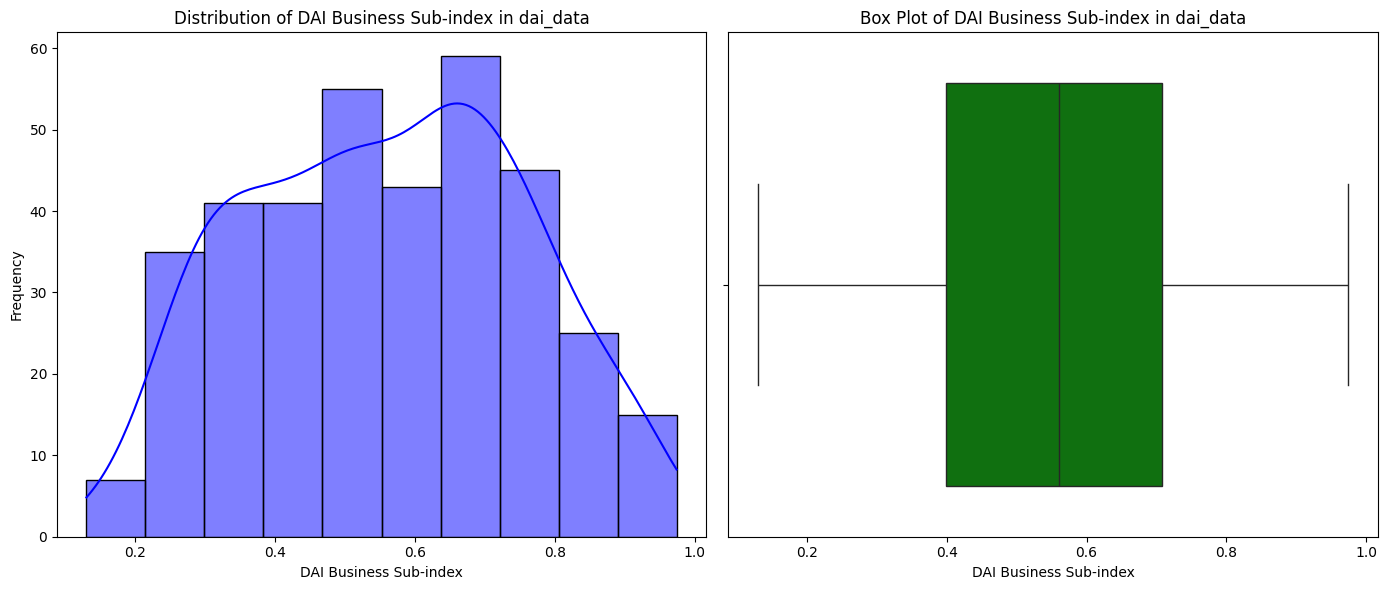

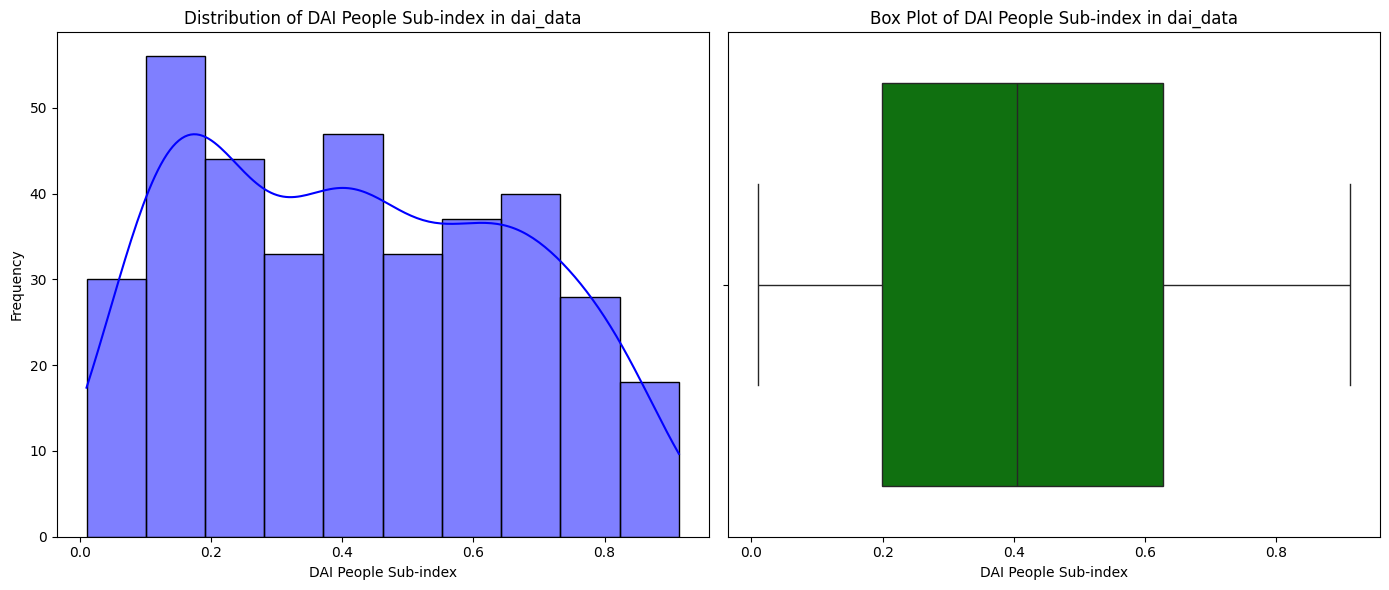

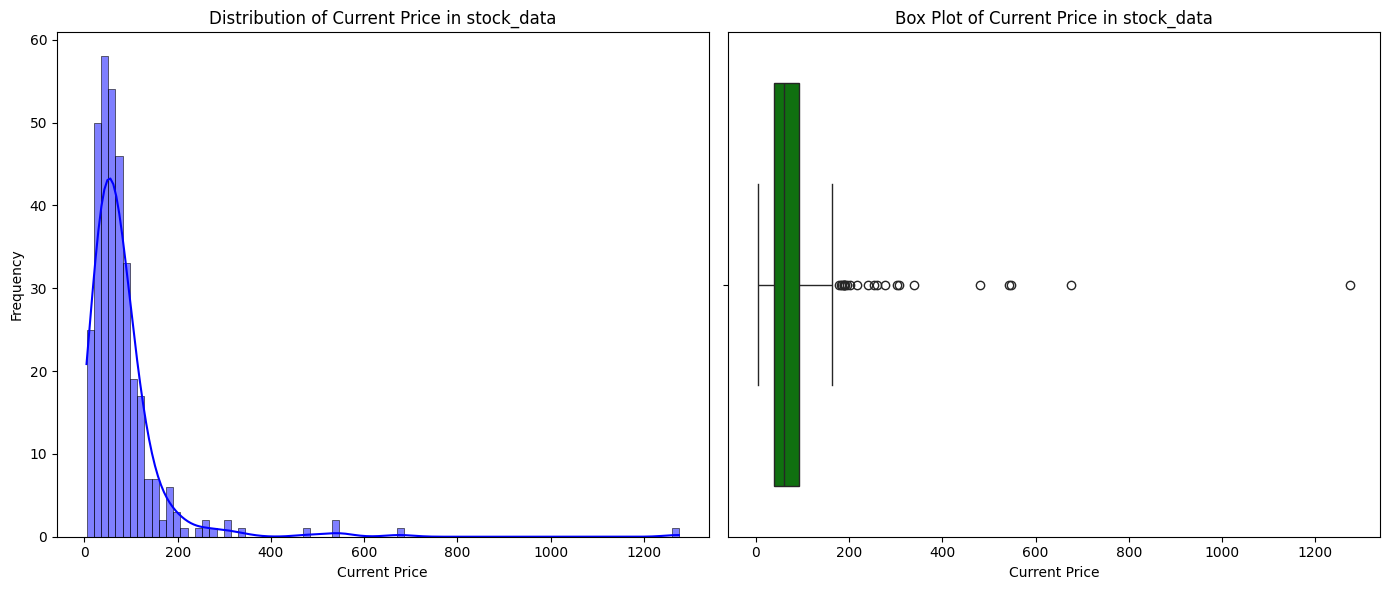

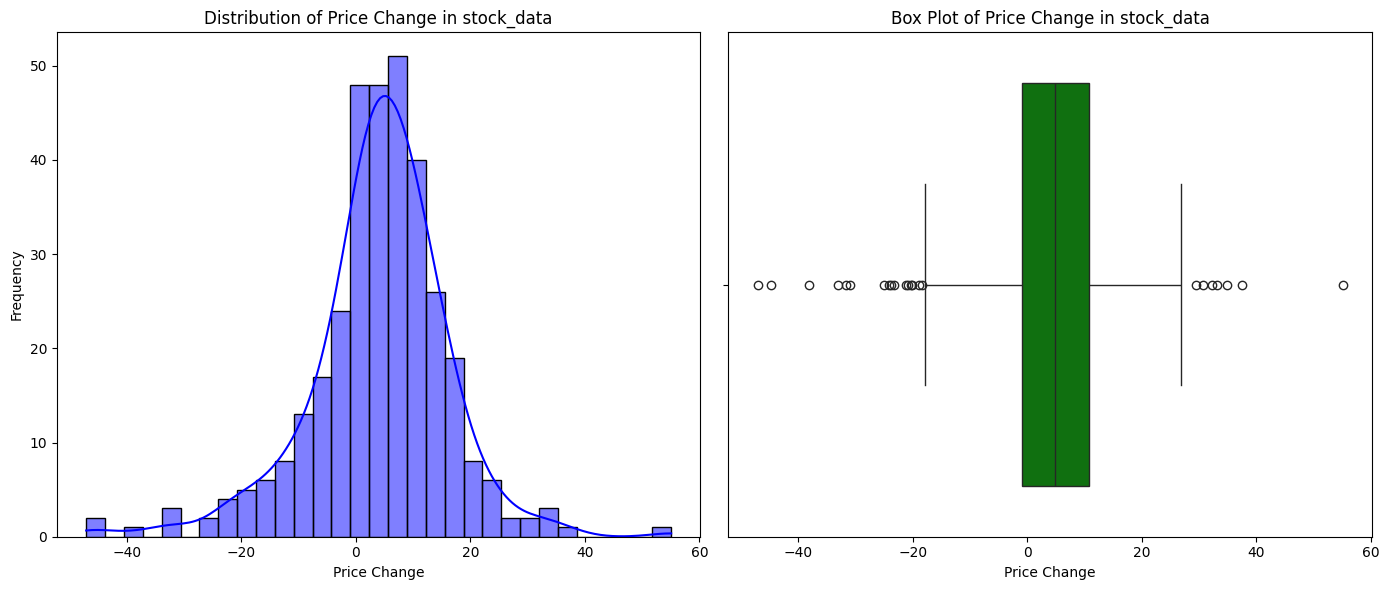

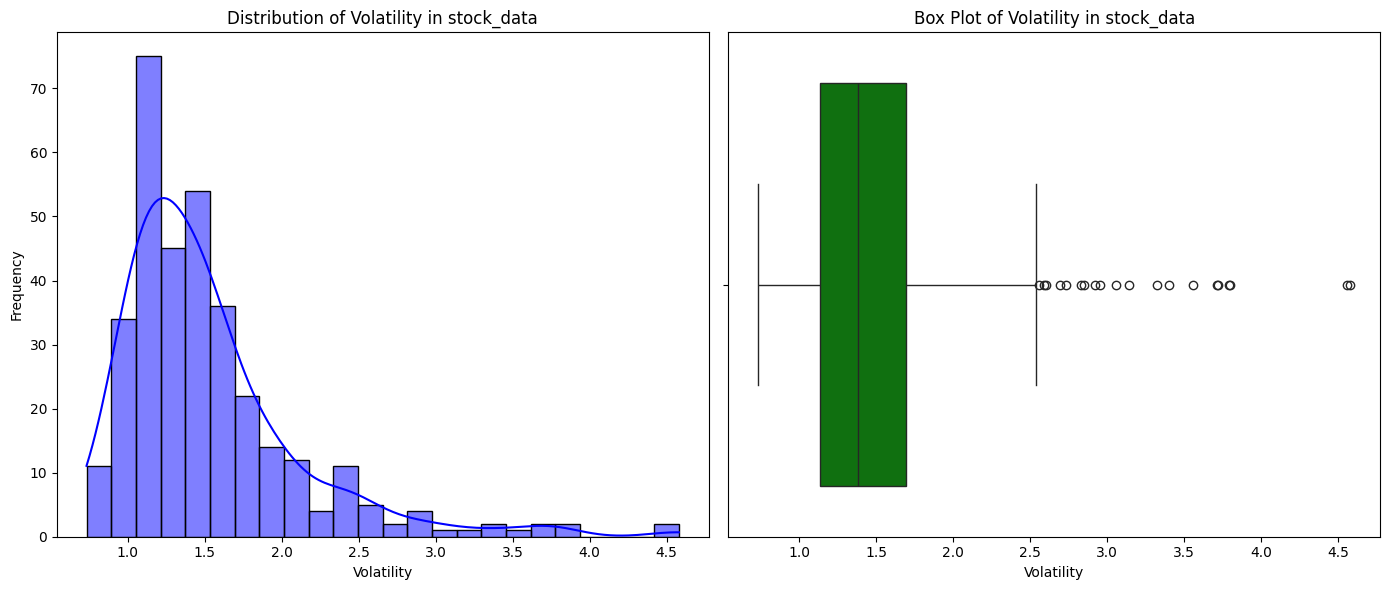

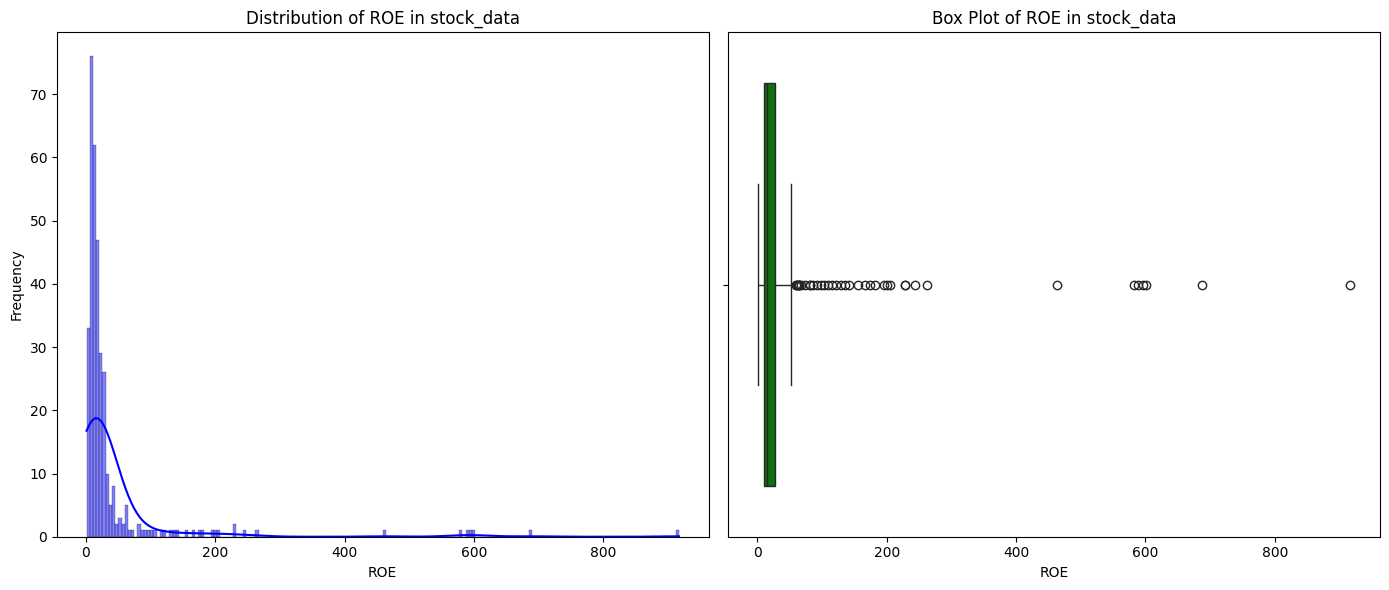

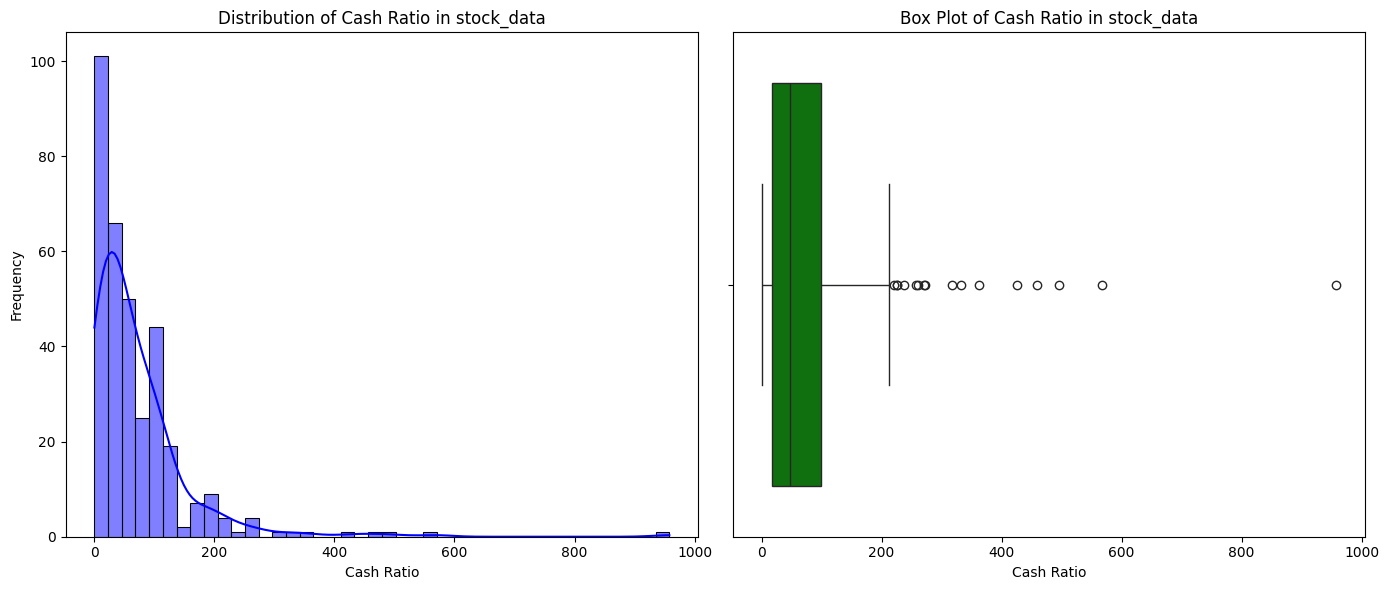

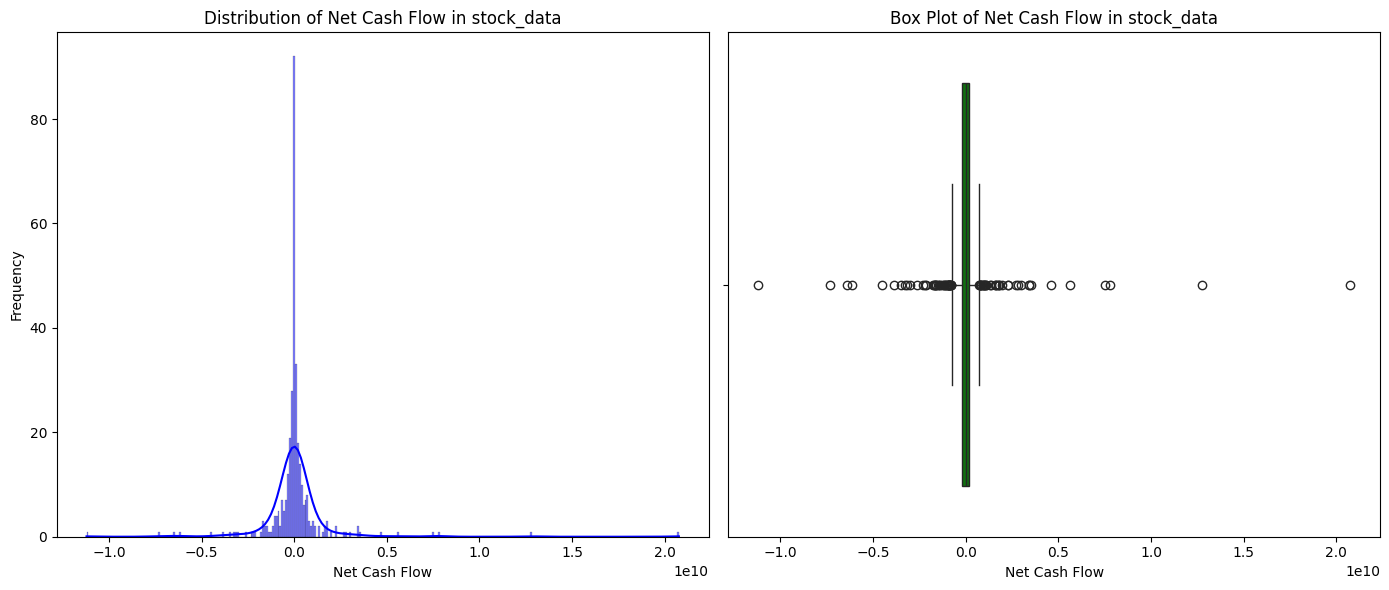

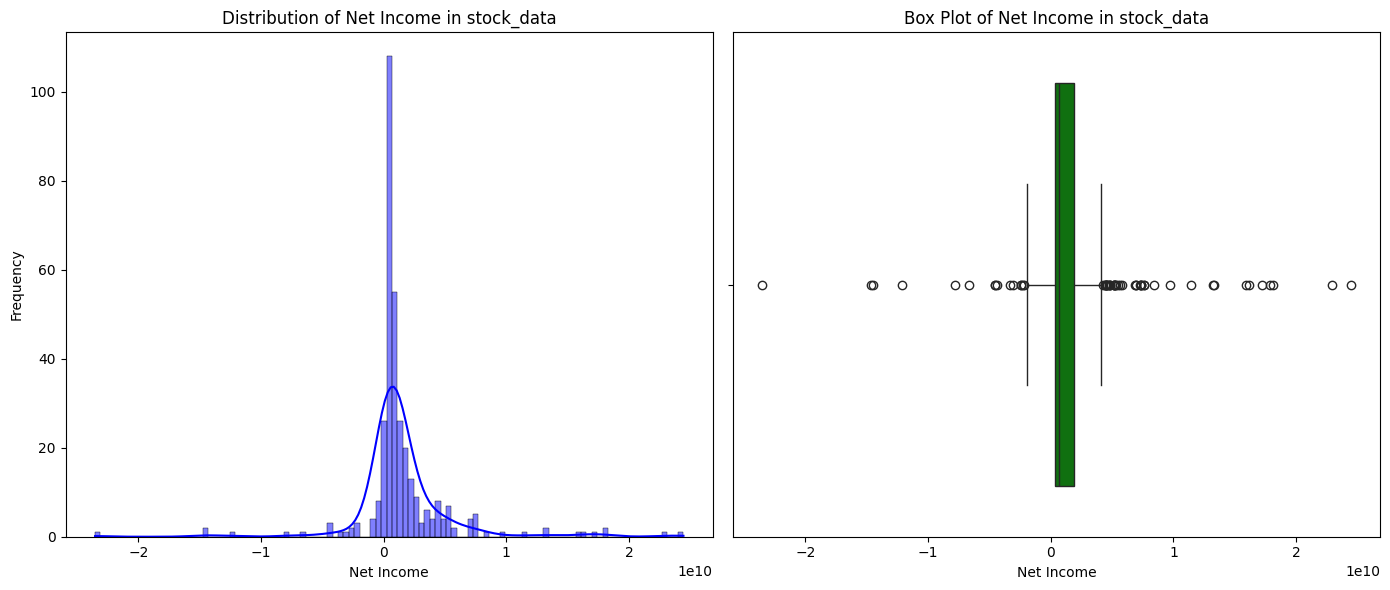

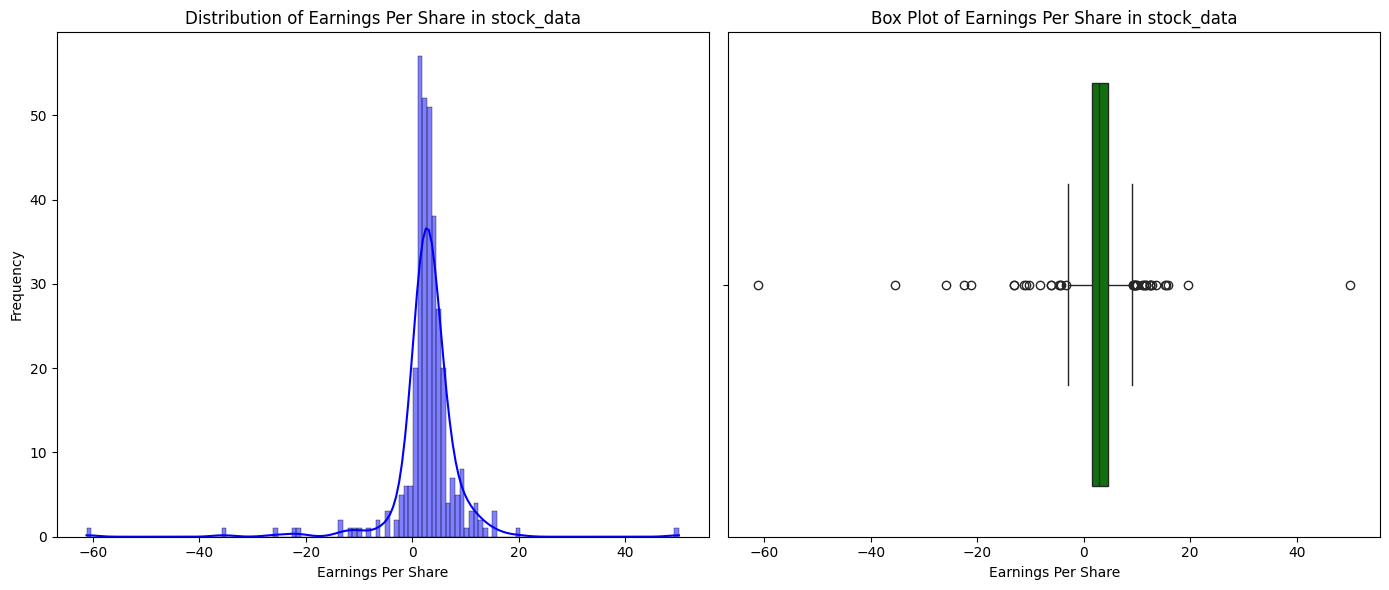

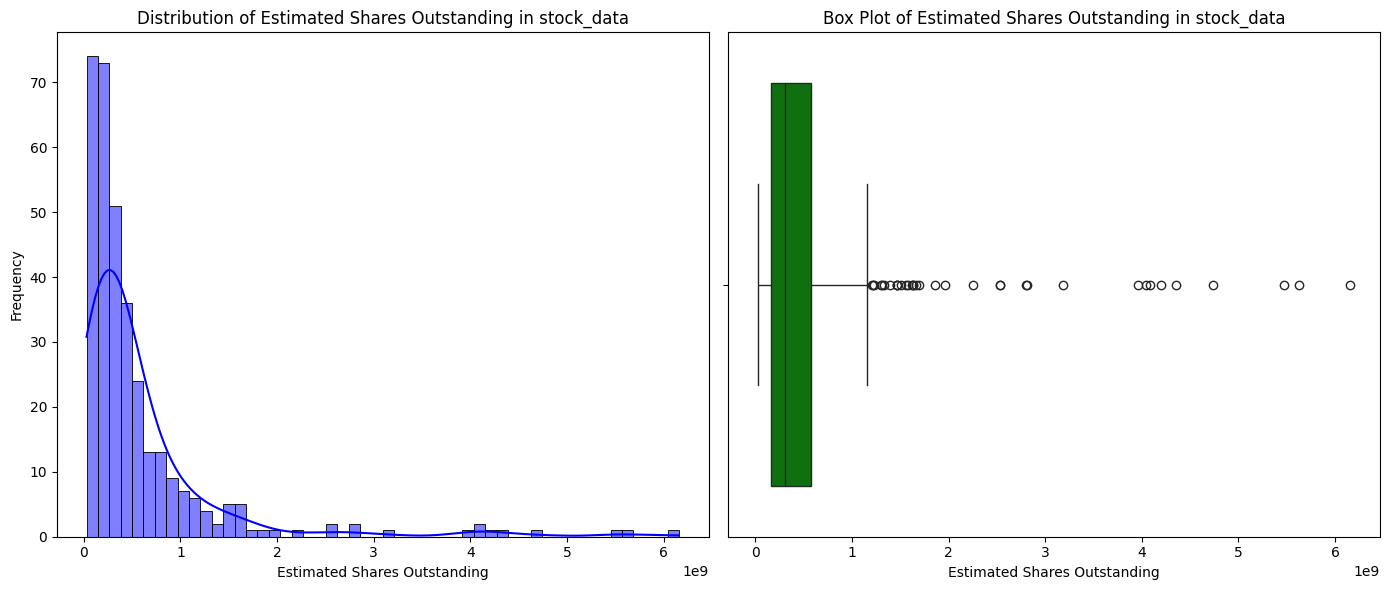

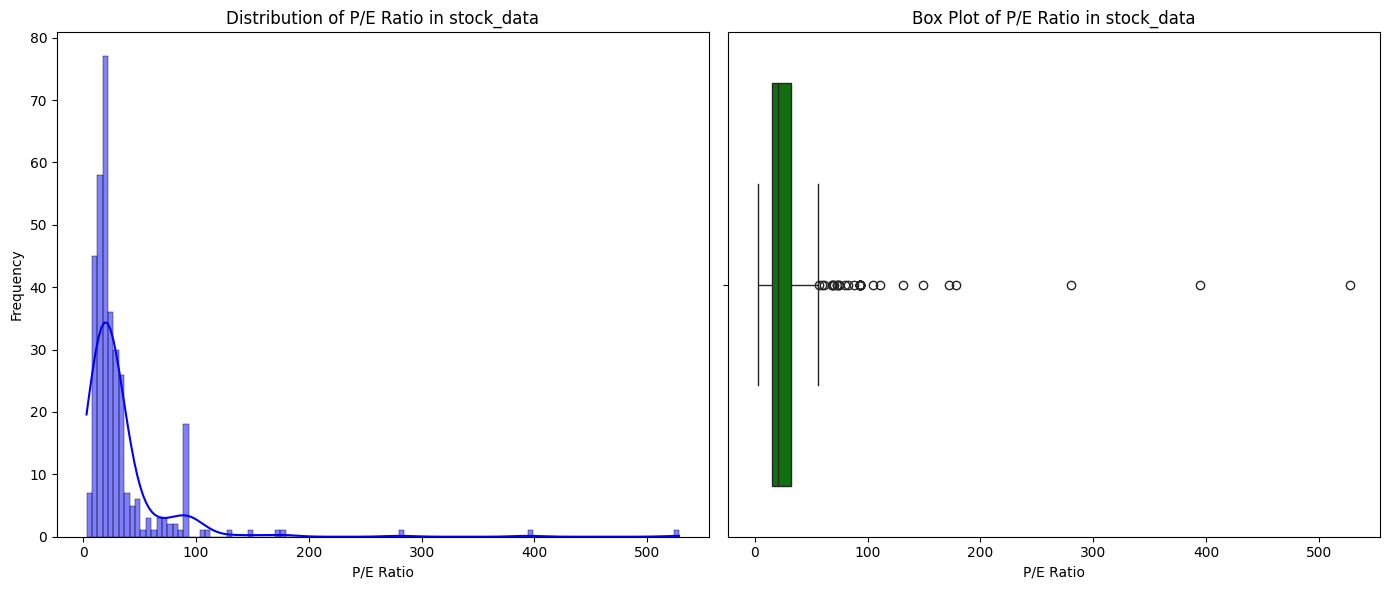

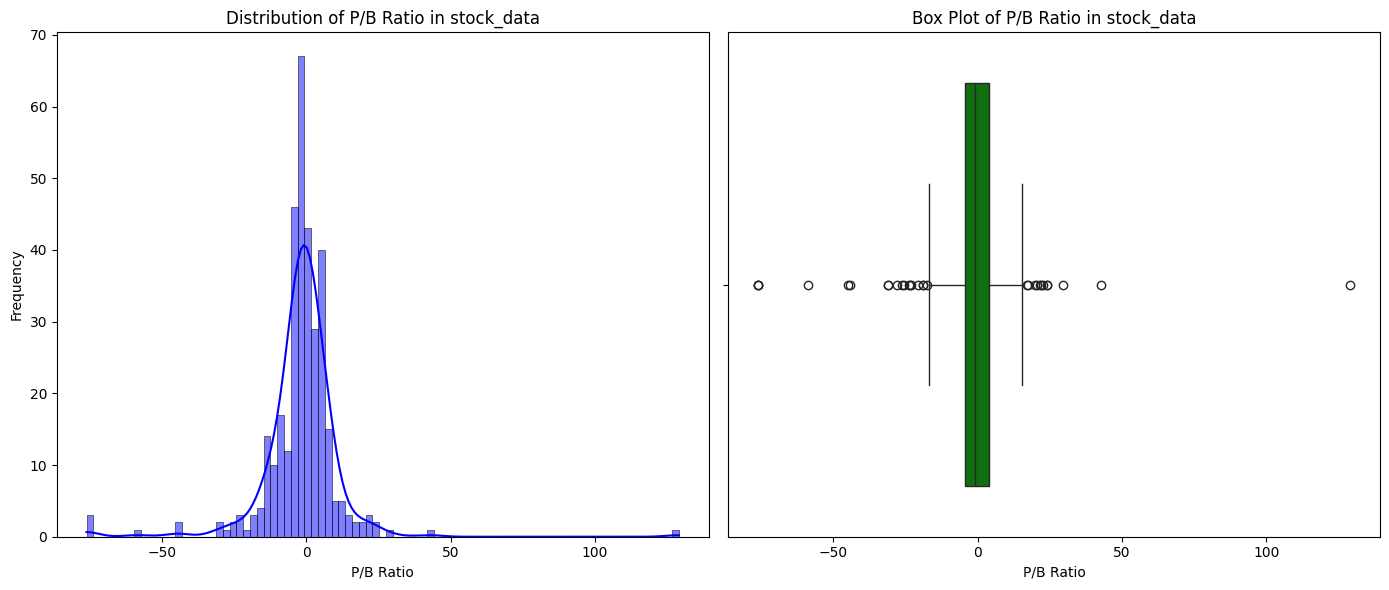

In [65]:
# Perform EDA on dai_data
perform_eda(dai_data, 'dai_data')

# Perform EDA on hatch_data
perform_eda(hatch_data, 'hatch_data')

# Perform EDA on stock_data
perform_eda(stock_data, 'stock_data')